## 볼린져 밴드
- 이동 평균 기준으로 상단과 하단 밴드활용
- BBand = 중심선 +(-) K * 표준편차
- 매매 시점 상단 돌파 - 과매수 상태,
- 매수 시점 하단 돌파 - 과매도 상태


In [27]:
import pandas as pd


In [28]:
from pykrx import stock
stock_df = stock.get_market_ohlcv_by_date('20000101','20191231','035420') # 네이버
stock_df_close = stock_df[['종가']]
stock_df_close.head()

,종가
날짜,
2002-10-29,2312
2002-10-30,2588
2002-10-31,2459
2002-11-01,2305
2002-11-04,2191


### 필요컬럼
- 이동 평균 (14일)
- 상,하단 표준 편차


In [29]:
stock_df_close['중심선'] = stock_df_close['종가'].rolling(window=14).mean()

/tmp/ipykernel_89370/1920385813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close['중심선'] = stock_df_close['종가'].rolling(window=14).mean()


In [30]:
stock_df_close[19:25]

,종가,중심선
날짜,,
2002-11-25,2138,2065.000000
2002-11-26,2102,2062.214286
2002-11-27,1979,2050.571429
2002-11-28,2070,2048.285714
2002-11-29,2316,2059.928571
2002-12-02,2379,2084.357143


In [31]:
K = 2
std_deviation = stock_df_close['종가'].rolling(window=14).std()
stock_df_close['상단선'] = stock_df_close['중심선'] + K * std_deviation
stock_df_close['하단선'] = stock_df_close['중심선'] - K * std_deviation



/tmp/ipykernel_89370/930140954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close['상단선'] = stock_df_close['중심선'] + K * std_deviation
/tmp/ipykernel_89370/930140954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df_close['하단선'] = stock_df_close['중심선'] - K * std_deviation


### Chart 작성

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

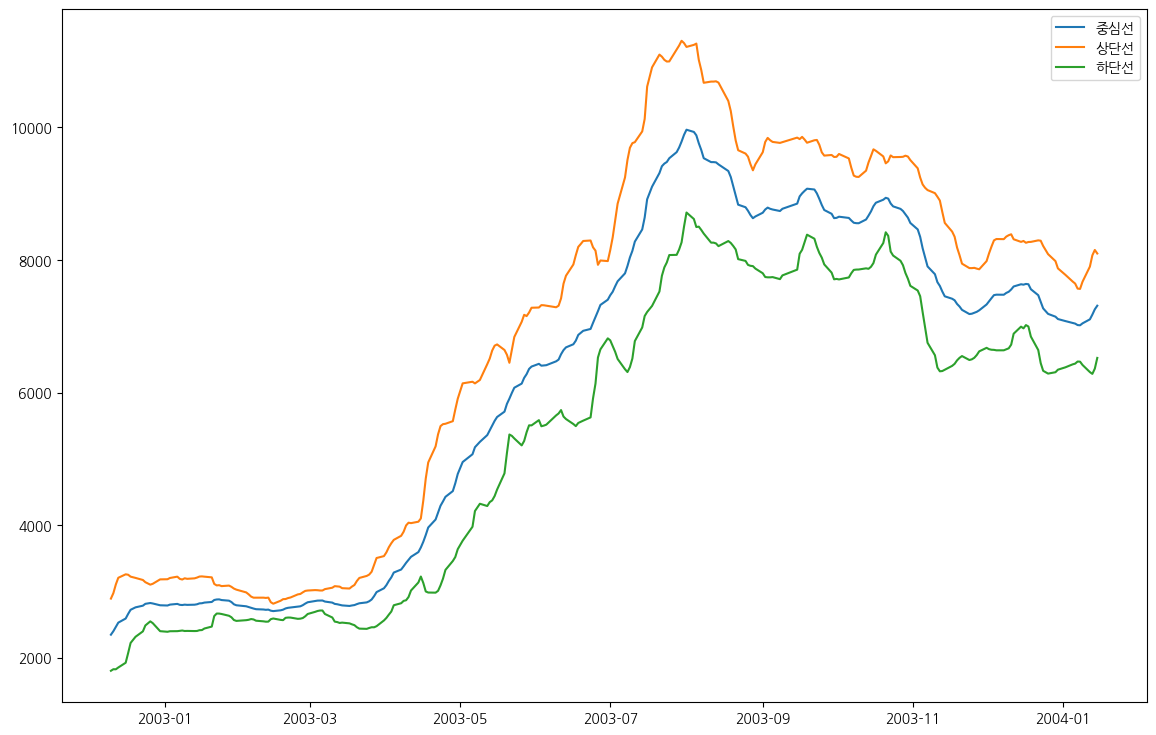

In [33]:
plt.figure(figsize=(14,9), dpi=100) # 
plt.plot(stock_df_close['중심선'][30:300],label='중심선')
plt.plot(stock_df_close['상단선'][30:300],label='상단선')
plt.plot(stock_df_close['하단선'][30:300],label='하단선')
plt.legend()
plt.show()